<a href="https://colab.research.google.com/github/benjaminmugangu/TP_FFNN_ML/blob/main/TP_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import des librairies
import pandas as pd

# Charger le dataset depuis ton fichier
df = pd.read_csv("/home/CONS-CARBURANT-CO2.csv")

# Afficher les premières lignes pour visualiser
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


## 1. Prétraitement des données

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Chargement des données
df = pd.read_csv("/home/CONS-CARBURANT-CO2.csv")

# Encodage des variables catégoriques
cols_cat = ['ship_type', 'route_id', 'month', 'fuel_type', 'weather_conditions']
for col in cols_cat:
    df[col] = LabelEncoder().fit_transform(df[col])

# Séparation des données
X = df.drop(columns=['ship_id', 'CO2_emissions'])
y = df['CO2_emissions']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 2. Modélisation avec un FFNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Architecture du FFNN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Régression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entraînement
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 380820480.0000 - mae: 13549.5684 - val_loss: 402618816.0000 - val_mae: 13962.6562
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 333123872.0000 - mae: 13007.1221 - val_loss: 402411328.0000 - val_mae: 13956.6240
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 373402400.0000 - mae: 13468.7090 - val_loss: 401908192.0000 - val_mae: 13943.9287
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 330382144.0000 - mae: 12754.5684 - val_loss: 400831104.0000 - val_mae: 13919.8408
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 318478368.0000 - mae: 12609.6084 - val_loss: 398786304.0000 - val_mae: 13878.1670
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 358567808.0000 - mae: 13288.2197 - val_loss: 395507328.0000 - val_mae: 13814.7998
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 384642208.0000 - mae: 13816.3203 - val_loss: 390710656.0000 - val_mae: 13725.2695
Epoch 8/50
36/36 ━━━━━━━━━━━━━━

## 3. Évaluation et visualisation

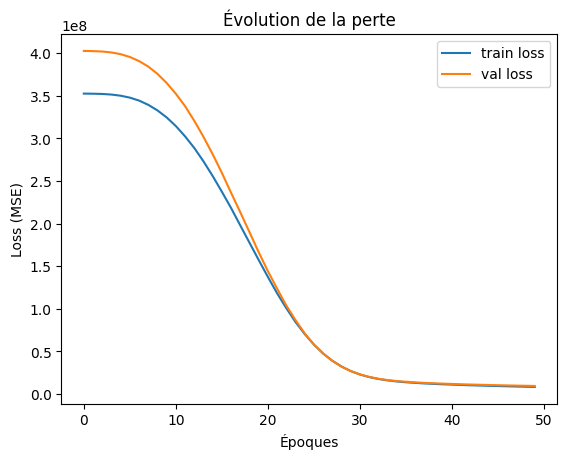

In [ ]:
import matplotlib.pyplot as plt

# Courbes d'entraînement
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Évolution de la perte")
plt.xlabel("Époques")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


## 4. Prédictions finales

In [ ]:
predictions = model.predict(X_test)

# Comparaison (optionnelle)
results = pd.DataFrame({'Vrai CO2': y_test.values, 'Prédit': predictions.flatten()})
print(results.head())


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
   Vrai CO2        Prédit
0   1536.98   3220.374268
1   7093.72   7093.539551
2   9594.88   8249.705078
3   2944.68   6139.928223
4  40318.82  42290.214844
